In [1]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

numpy version	: 1.16.2
pandas version	: 0.24.2
seaborn version	: 0.9.0
numpy version	: 1.16.2
pandas version	: 0.24.2
seaborn version	: 0.9.0


In [2]:
loan = pd.read_csv("loan.csv",encoding = 'ISO-8859-1',dtype='object')
print(loan.shape)

(39717, 111)


In [3]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


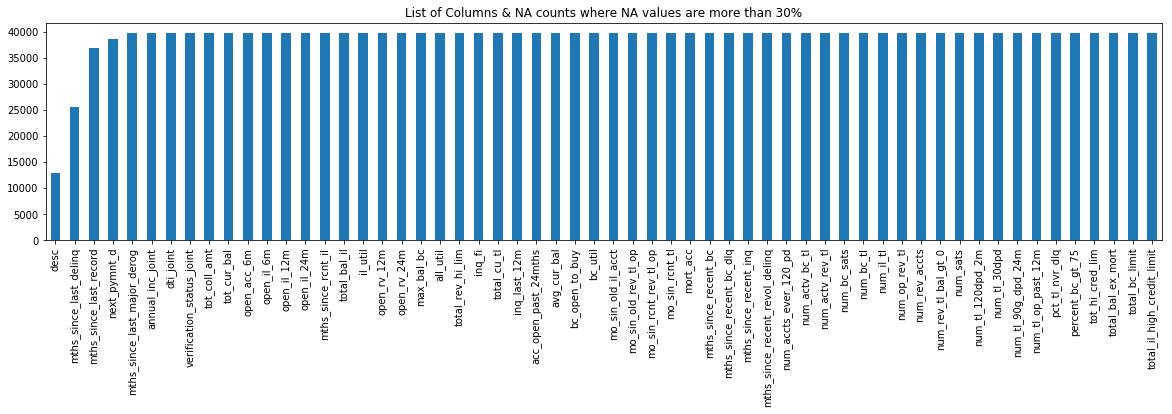

In [4]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [5]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  A
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [6]:
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


In [7]:
loan = removeNulls(loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 53) 
New dataset rows,columns (39717, 53)


In [8]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [9]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


In [10]:
not_required_columns = ["id","member_id","url","zip_code","title"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 39) rows & columns.


In [11]:
def removeOutliers(columnName):
    P = np.percentile(loan[columnName], [5, 99])
    loan[columnName] = loan[(loan[columnName] > P[0]) & (loan[columnName]  < P[1])]

In [12]:
#Convert all date column from object to datetime object type
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')


In [13]:
#Cast all continuos variables to numeric so that we can find a correlation between them
loan['int_rate'] = loan['int_rate'].str.replace('%',' ')
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti', \
                   'total_rec_late_fee','total_pymnt','total_rec_int']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

### below code remove outliers between 5 - 95% using funciton removeOutliers for the continuous columns used
below
1. annual_inc
2. 'loan_amnt
3. 'funded_amnt
4. funded_amnt_inv
5. 'int_rate
6. dti
7. 'installment

In [14]:
# remove outliers
removeOutliers('annual_inc')
removeOutliers('loan_amnt')
removeOutliers('funded_amnt')
removeOutliers('funded_amnt_inv')
removeOutliers('int_rate')
removeOutliers('dti')
removeOutliers('installment')

In [15]:
# fill null values with median
loan['annual_inc'] = loan['annual_inc'].fillna(loan['annual_inc'].median())
loan['loan_amnt'] = loan['loan_amnt'].fillna(loan['loan_amnt'].median())
loan['funded_amnt'] = loan['funded_amnt'].fillna(loan['funded_amnt'].median())
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].fillna(loan['funded_amnt_inv'].median())
loan['int_rate'] = loan['int_rate'].fillna(loan['int_rate'].median())
loan['dti'] = loan['dti'].fillna(loan['dti'].median())
loan['installment'] = loan['installment'].fillna(loan['installment'].median())

In [16]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0000,5000.0000,5000.0000,36 months,5000.0000,5000.0000,B,B2,NaN,10+ years,RENT,10000.0000,Verified,2011-12-01,Fully Paid,credit_card,AZ,10000.0000,0,1985-01-01,1,3,0,13648,83.70%,9,0,0,5863.1552,5833.84,5000,863.1600,0.0000,0,0,2015-01-01,171.62,2016-05-01,0
1,2500.0000,2500.0000,2500.0000,60 months,2500.0000,10000.0000,C,C4,Ryder,< 1 year,RENT,2500.0000,Source Verified,2011-12-01,Charged Off,car,GA,10000.0000,0,1999-04-01,5,3,0,1687,9.40%,4,0,0,1008.7100,1008.71,456.46,435.1700,0.0000,117.08,1.11,2013-04-01,119.66,2013-09-01,0


In [17]:
colNames = loan.columns
print("Column Name = ",colNames)

Column Name =  Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [18]:
print(loan.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


# Note: All graphs are plotted after excluding outliers, with the range of 5 to 95% and filling null values with median

### Univatirate analysis

1. loan status count

['Fully Paid' 'Charged Off' 'Current']


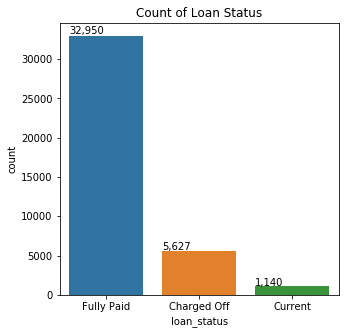

In [19]:
print(loan.loan_status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(loan.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

2. term count for each loan status

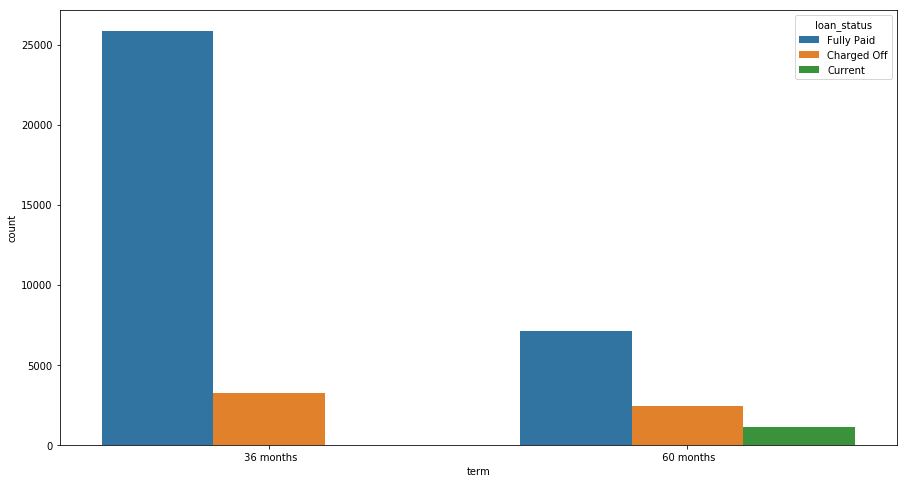

In [20]:
# plotting loan_staus with respect to terms
plt.figure(figsize=(15,8))
sns.countplot(x='term',hue='loan_status',data=loan)

#### Interence : from the above gragh ,  chargedOff (defaulters) take loan with  long term tenor (60 months) and  there is no short term for Current loan status

3. Grad and Sub-grad count for FullyPaid, Charged Off and Current Loan Status

In [21]:
fullyPaidLoan = loan[loan["loan_status"] == "Fully Paid"]
defualtedLoan = loan[loan["loan_status"] == "Charged Off"]
currentLoan = loan[loan["loan_status"] == "Current"]


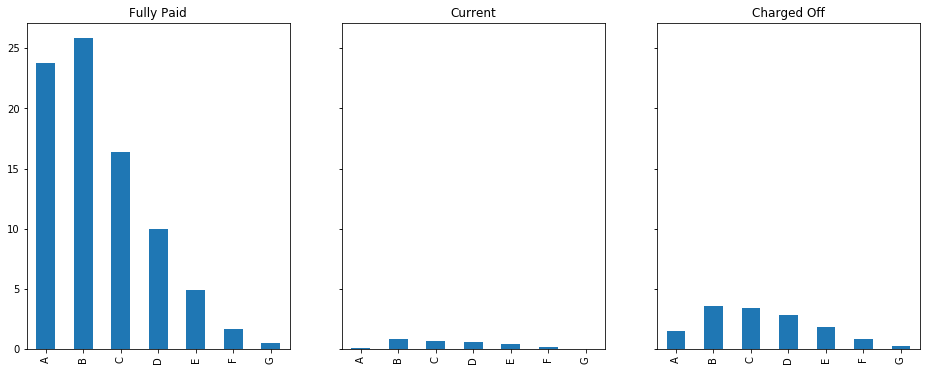

In [22]:
# plot the grad count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")


fullPaidSer = (((fullyPaidLoan.grade.value_counts())/len(loan.grade))*100).sort_index()
currentSer = (((currentLoan.grade.value_counts())/len(loan.grade))*100).sort_index()
ChargedOffSer = (((defualtedLoan.grade.value_counts())/len(loan.grade))*100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')


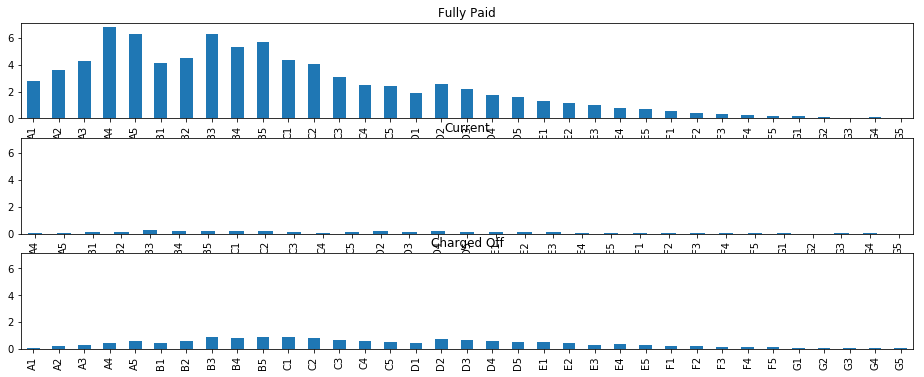

In [23]:
# plot the sub_grade count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")


fullPaidSer = (((fullyPaidLoan.sub_grade.value_counts())/len(loan.sub_grade))*100).sort_index()
currentSer = (((currentLoan.sub_grade.value_counts())/len(loan.sub_grade))*100).sort_index()
ChargedOffSer = (((defualtedLoan.sub_grade.value_counts())/len(loan.sub_grade))*100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')


### Inference : we consider percentage for grade and subgrade columns.
1. when we see the graph , with grade and subgrade , we found that FullyPaid Loans  status are higher then charged off and current Loan status.
2. This graph was ploted on the basis of excluding the outliers in loan dataset.



4. Home Ownership count for FullyPaid, Current and Charged Off loan status

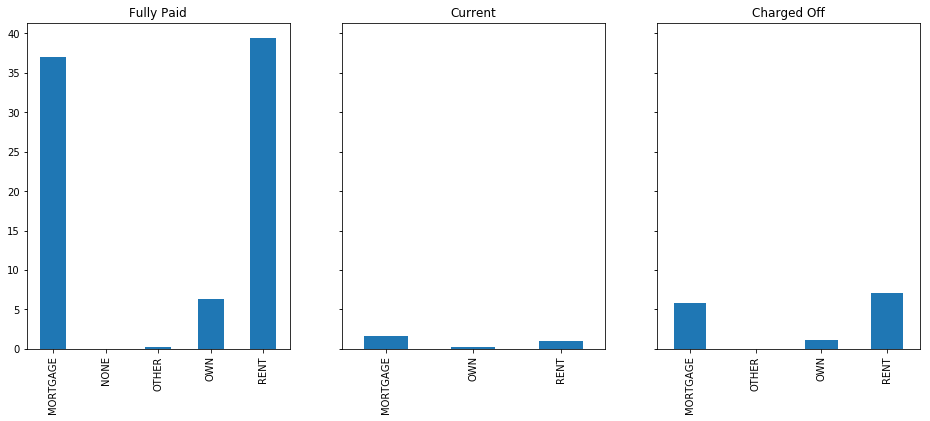

In [24]:
# plot the home_ownership count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")

fullPaidSer = (((fullyPaidLoan.home_ownership.value_counts())/len(loan.home_ownership))*100).sort_index()
currentSer = (((currentLoan.home_ownership.value_counts())/len(loan.home_ownership))*100).sort_index()
ChargedOffSer = (((defualtedLoan.home_ownership.value_counts())/len(loan.home_ownership))*100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')

###  Inference : the above home_owner ship  analysis did not help to deduce any inference

5. Verification Status for FullyPaid, Current and Charged Off loan status

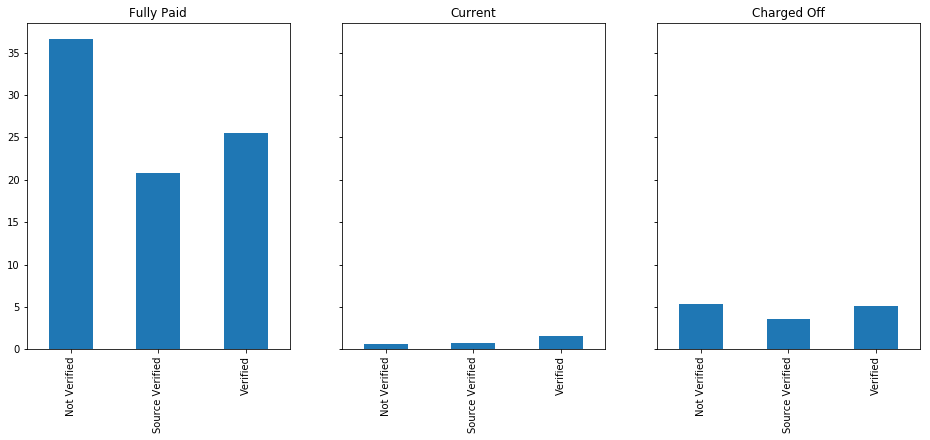

In [25]:
# plot the vertification status count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")


fullPaidSer = (((fullyPaidLoan.verification_status.value_counts())/len(loan.verification_status)) *100).sort_index()
currentSer = (((currentLoan.verification_status.value_counts())/len(loan.verification_status)) *100).sort_index()
ChargedOffSer = (((defualtedLoan.verification_status.value_counts())/len(loan.verification_status)) *100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')

### Inference:  The number of application for FullyPaid are verified more then ChargedOff applicants, this parameter could not help me to deduce any interence.

6. Purpose count for FullyPaid, current and chared Off

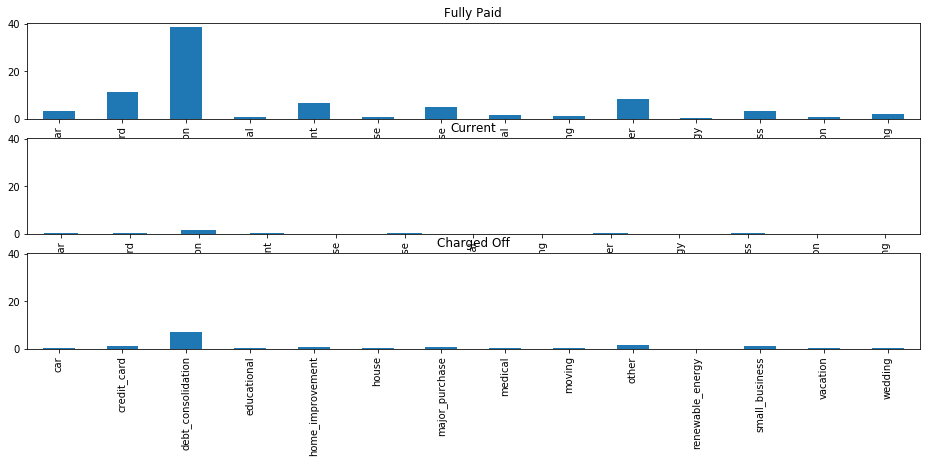

In [26]:
# plot the purpose status count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")


fullPaidSer = (((fullyPaidLoan.purpose.value_counts())/len(loan.purpose)) *100).sort_index()
currentSer = (((currentLoan.purpose.value_counts())/len(loan.purpose)) *100).sort_index()
ChargedOffSer = (((defualtedLoan.purpose.value_counts())/len(loan.purpose)) *100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')

###  Inference : comapre to fully paid , defaulted loans are in lower range in all purpose.
### Amoung the borrowers , it is observed that credit_card, debt_consolidation, other and small_business are defaulted more.

7. emp_length count for Fully Paid, Current and Chared off

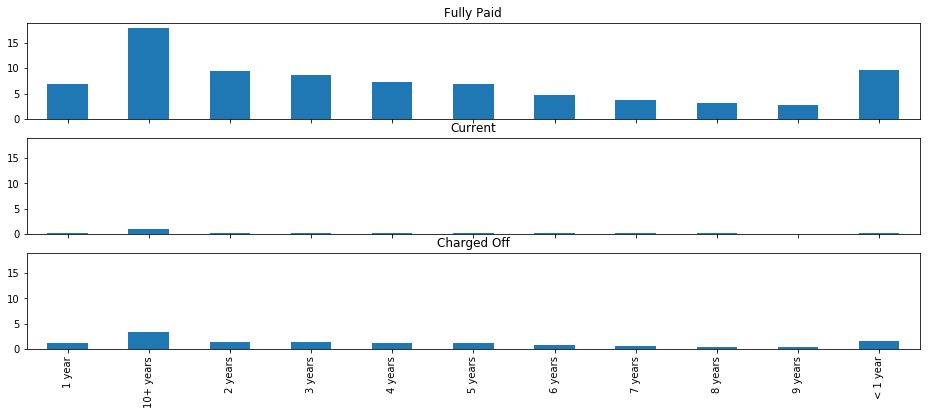

In [27]:
# plot the emp_length count between fullyPaid and defaulted

f, (ax1, ax2,ax3) = plt.subplots(3,sharex=True, sharey=True, figsize=(16,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")

fullPaidSer = (((fullyPaidLoan.emp_length.value_counts())/len(loan.emp_length)) *100).sort_index()
currentSer = (((currentLoan.emp_length.value_counts())/len(loan.emp_length)) *100).sort_index()
ChargedOffSer = (((defualtedLoan.emp_length.value_counts())/len(loan.emp_length)) *100).sort_index()

fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')


### Inference : borrowers with 10+years and < 1 year  employent length are defaulted more, when compare to others

8. Address state value count for Fully paid, current and defaulted

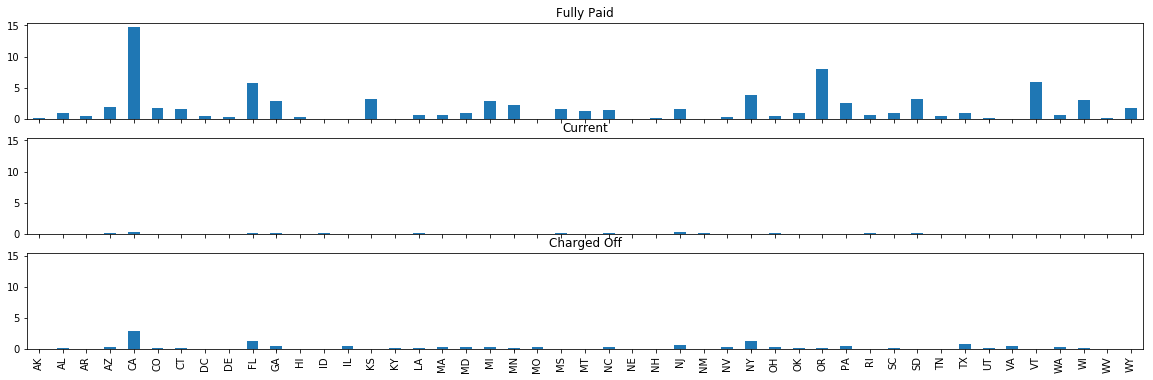

In [28]:
# plot the state count between fullyPaid and defaulted
f, (ax1, ax2,ax3) = plt.subplots(3,sharex=True, sharey=True, figsize=(20,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")

fullPaidSer = (((fullyPaidLoan.addr_state.value_counts())/len(loan.addr_state))*100).sort_index()
currentSer = (((currentLoan.addr_state.value_counts())/len(loan.addr_state)) *100).sort_index()
ChargedOffSer =( ((defualtedLoan.addr_state.value_counts())/len(loan.addr_state)) *100).sort_index()


fullPaidSer.plot(ax=ax1,kind='bar')
currentSer.plot(ax=ax2,kind='bar')
ChargedOffSer.plot(ax=ax3,kind='bar')


#### Inference: Loans taken from state CA,FL,IL,NJ,NY,PA and TX are more defaulted, Loans taken from CA,SD, TN, MS, MT , VT and WY are Properly Paid the loan.
   

9. dti distribtion for Fully paid, chargedOff and current

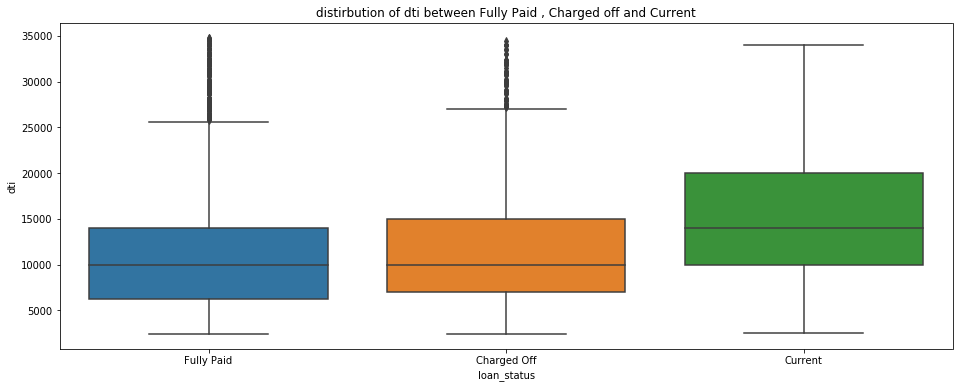

In [29]:
# plot the dti range between fullyPaid and defaulted

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(16,6))
ax1.title.set_text("distirbution of dti between Fully Paid , Charged off and Current")
sns.boxplot(x="loan_status", y="dti",data=loan,ax=ax1)


####  Inference :  dti value for the charged off , in the third quarantile are more, when compared to fullypaid


10. loan_amount distirbution between FullyPaid, charged off and current

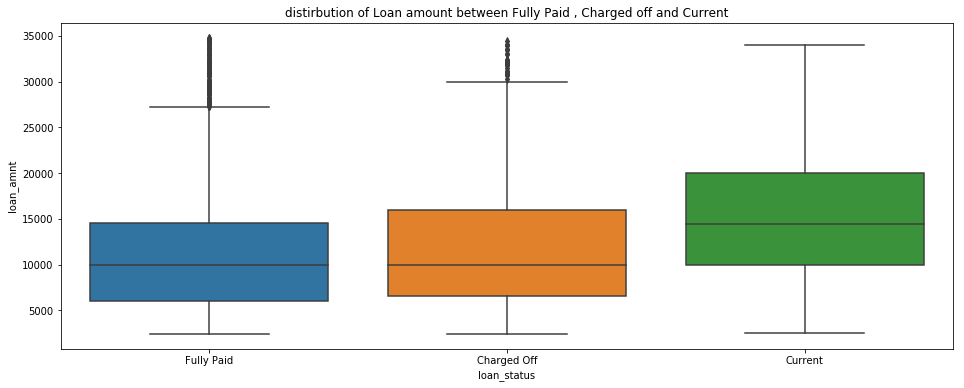

In [30]:
# plot the loan_amount range between fullyPaid , charged off and current

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(16,6))
ax1.title.set_text("distirbution of Loan amount between Fully Paid , Charged off and Current")
sns.boxplot(x="loan_status", y="loan_amnt",data=loan,ax=ax1)


####  Inference : as we observed from the above grapth,  defaulters take more loan amount in the range of 10000 to 17000.

11, annual income distribution for fullyPaid, charged off and current

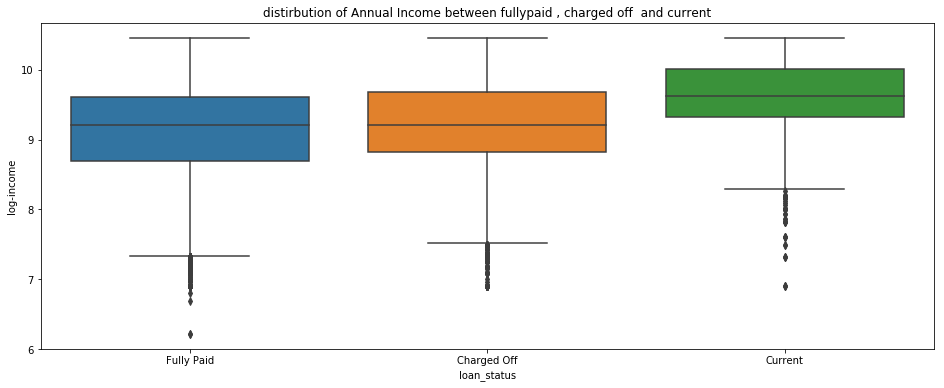

In [31]:
# plot the annual income range between fullyPaid and defaulted

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(16,6))
ax1.title.set_text("distirbution of Annual Income between fullypaid , charged off  and current")
loan['log-income'] = np.log(loan['annual_inc'])
sns.boxplot(x="loan_status", y="log-income",data=loan,ax=ax1)


#### Inference : The number of lower income loans are more in Fully paid when compared to Defaulters

12, interest rate distribution for Fully paid, current and defaulters


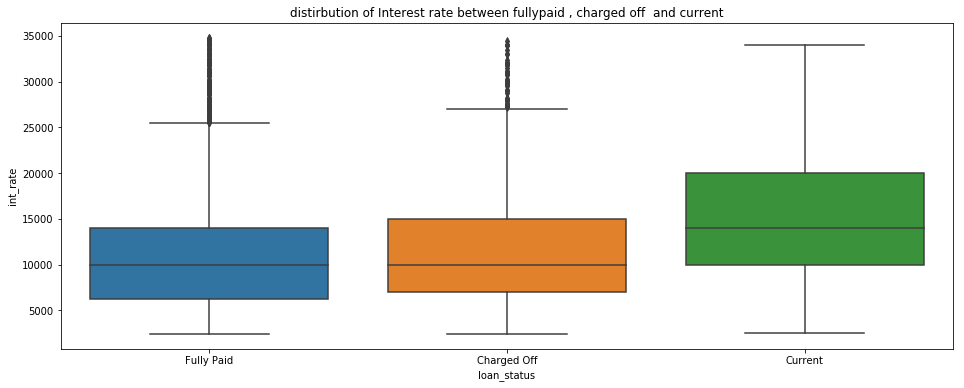

In [32]:
# plot box plot for interest rate
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(16,6))
ax1.title.set_text("distirbution of Interest rate between fullypaid , charged off  and current")
sns.boxplot(x="loan_status", y="int_rate",data=loan,ax=ax1)

####  Inference : FullyPaid loans goes for lower interest rate, charged off and current loan type goes for higher interest rate

## Correlation Matrix and Heat Map

1. Correlaiton matrix

In [33]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,total_pymnt,total_rec_int,total_rec_late_fee,log-income
loan_amnt,1.0000,0.9997,0.9929,0.9712,0.9791,0.8461,0.9708,0.7666,0.6148,0.0376,0.7659
funded_amnt,0.9997,1.0000,0.9931,0.9708,0.9793,0.8459,0.9704,0.7665,0.6147,0.0375,0.7655
funded_amnt_inv,0.9929,0.9931,1.0000,0.9634,0.9724,0.8404,0.9647,0.7625,0.6135,0.0385,0.7597
int_rate,0.9712,0.9708,0.9634,1.0000,0.9490,0.8216,0.9425,0.7445,0.5803,0.0314,0.7437
installment,0.9791,0.9793,0.9724,0.9490,1.0000,0.8291,0.9502,0.7487,0.6102,0.0380,0.7555
annual_inc,0.8461,0.8459,0.8404,0.8216,0.8291,1.0000,0.8236,0.8514,0.7062,0.0508,0.9156
dti,0.9708,0.9704,0.9647,0.9425,0.9502,0.8236,1.0000,0.7457,0.6042,0.0363,0.7445
total_pymnt,0.7666,0.7665,0.7625,0.7445,0.7487,0.8514,0.7457,1.0000,0.8288,0.0130,0.7756
total_rec_int,0.6148,0.6147,0.6135,0.5803,0.6102,0.7062,0.6042,0.8288,1.0000,0.0691,0.6095
total_rec_late_fee,0.0376,0.0375,0.0385,0.0314,0.0380,0.0508,0.0363,0.0130,0.0691,1.0000,0.0373


2. Heat Map

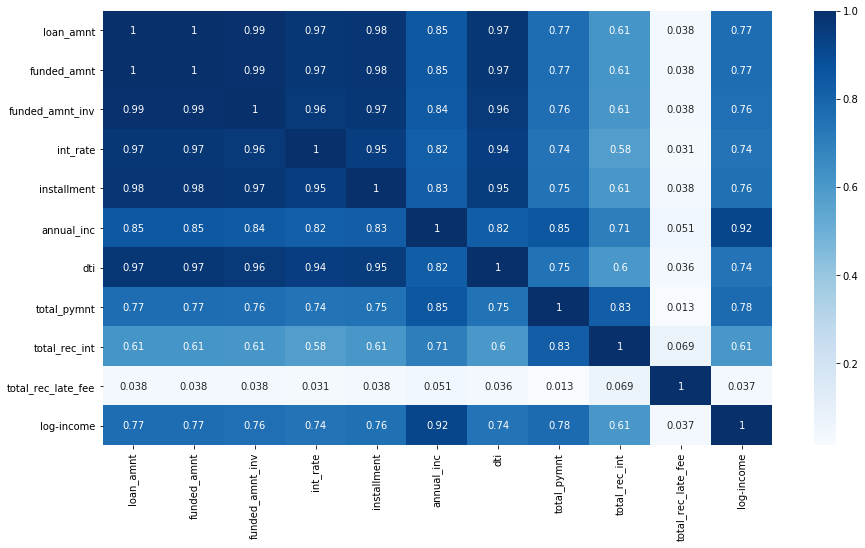

In [34]:
# Plotting heatmap of Data correlation
plt.figure(figsize=(15,8))
sns.heatmap(data=loan.corr(), cmap='Blues',annot=True)

####  Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis. 

## Bivariate Analysis

1. distibution of interest rate Vs tenor(term)

In [35]:
target = [1 if i==' 36 months' else 0 for i in loan['term']]
loan['target'] = target
loan['target'].value_counts()

1    29096
0    10621
Name: target, dtype: int64

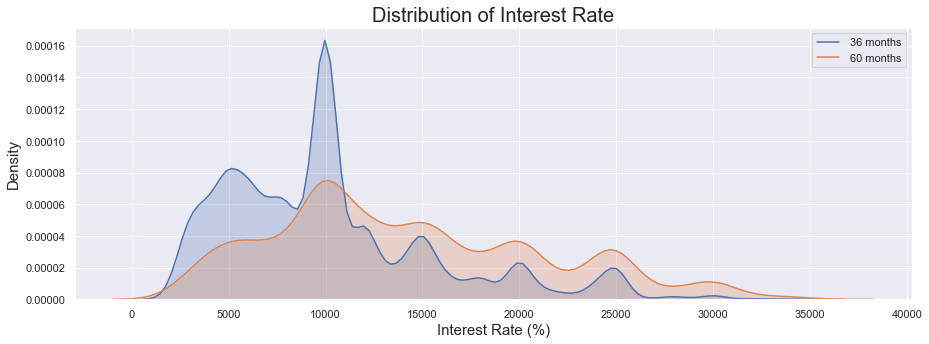

In [36]:
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(loan.loc[loan['target'] == 1, 'int_rate'], label = ' 36 months',shade=True)
sns.kdeplot(loan.loc[loan['target'] == 0, 'int_rate'], label = ' 60 months',shade=True);
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

#### Inference : as we can see from the plot  , interest rate is higher for lesser tenor


2.  Distirbution of loan amount Vs total recovery late fee

In [37]:
loan=loan.drop('target',axis=1)
loan=loan.drop('log-income',axis=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


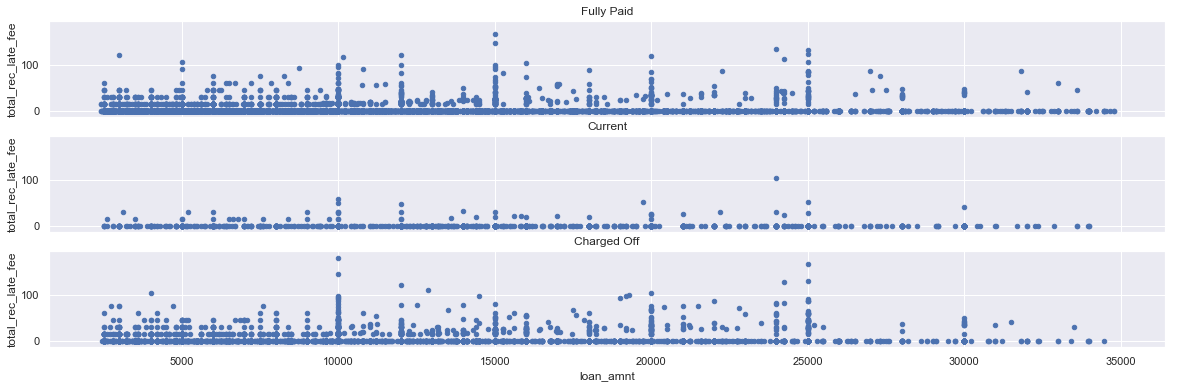

In [38]:

f, (ax1, ax2,ax3) = plt.subplots(3,sharex=True, sharey=True, figsize=(20,6))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")

var1 = 'loan_amnt'
data1 = pd.concat([fullyPaidLoan['total_rec_late_fee'], fullyPaidLoan[var1]], axis=1)
data1.plot.scatter(x=var1, y='total_rec_late_fee',ax=ax1);

var2 = 'loan_amnt'
data2 = pd.concat([currentLoan['total_rec_late_fee'], currentLoan[var2]], axis=1)
data2.plot.scatter(x=var2, y='total_rec_late_fee', ax=ax2);

var3 = 'loan_amnt'
data3 = pd.concat([defualtedLoan['total_rec_late_fee'], defualtedLoan[var3]], axis=1)
data3.plot.scatter(x=var3, y='total_rec_late_fee',ax=ax3);




### Inference : from the above graph , we can conclude that loan amount ranging between 10000 to 25000 are paying more total_rec_late_fee, borrowers paying more total_rec_late_fee may end up being defaulted

3. Distribution of annual income vs loan amount

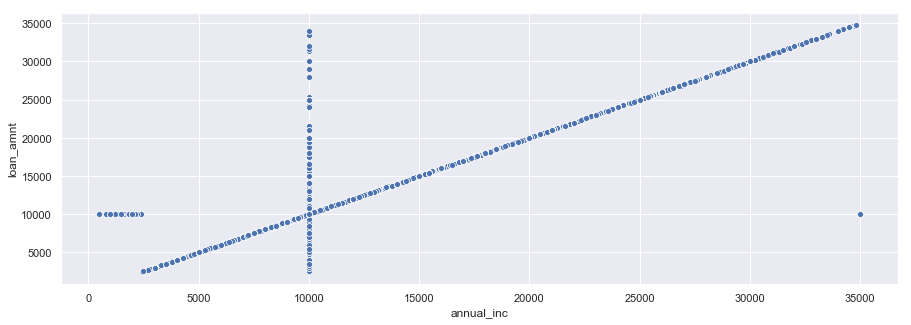

In [39]:
sns.scatterplot(x=loan['annual_inc'],y=loan['loan_amnt'])

#### Inference :  the association between loan_amount and annual income is linear and positive

4. Distibution of Annul income vs loan mount for Fully paid, Defaulters and current loan status

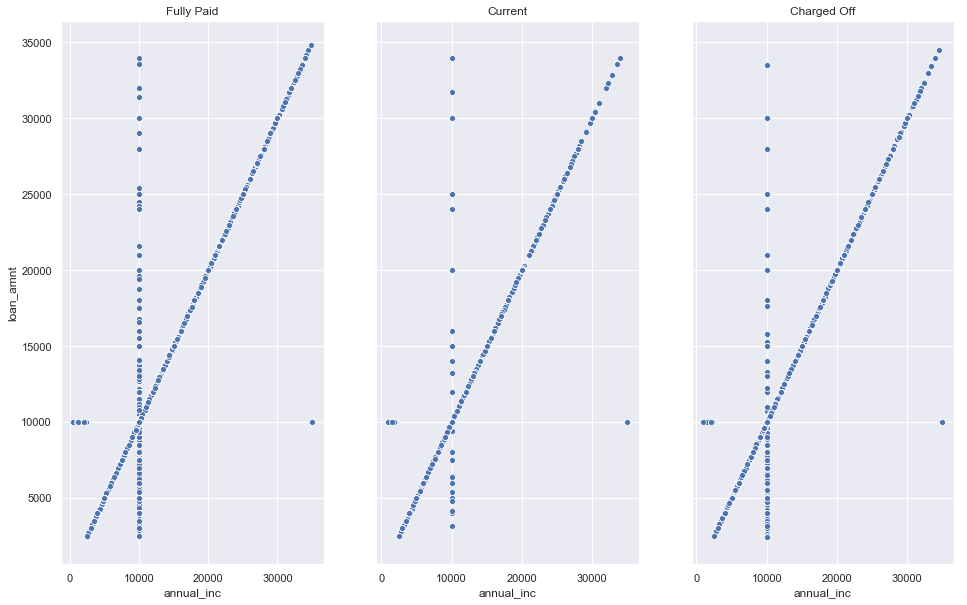

In [40]:

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,10))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")


sns.scatterplot(x=fullyPaidLoan['annual_inc'],y=fullyPaidLoan['loan_amnt'],ax=ax1)
sns.scatterplot(x=currentLoan['annual_inc'],y=currentLoan['loan_amnt'],ax=ax2)
sns.scatterplot(x=defualtedLoan['annual_inc'],y=defualtedLoan['loan_amnt'],ax=ax3)

#### Inference :  the association between loan_amount and annual income is linear and positive

4. Distibution of Loan Amount Vs Purpose for Fully paid, Current and Charged off 

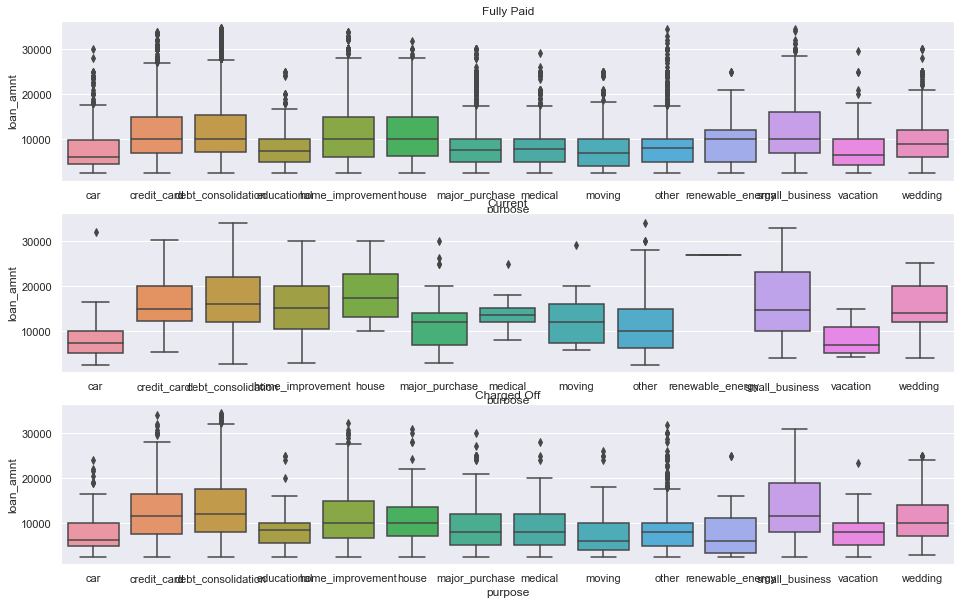

<Figure size 1152x864 with 0 Axes>

In [41]:
f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(16,10))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")

plt.figure(figsize=(16,12))
fullyPaidLoan.sort_values(['purpose'],inplace=True)
currentLoan.sort_values(['purpose'],inplace=True)
defualtedLoan.sort_values(['purpose'],inplace=True)
sns.boxplot(data =fullyPaidLoan, x='purpose', y='loan_amnt', ax=ax1)
sns.boxplot(data =currentLoan, x='purpose', y='loan_amnt', ax=ax2)
sns.boxplot(data =defualtedLoan, x='purpose', y='loan_amnt', ax=ax3)



#### higher  the range amount for below purpose loand , changes of getting defaulted are more. 
1. Educational
2. Renewabal energy
3. Vaction
4. Major purchace

<font color='blue'> Insights: Applicants who has taken the Loan for above purpose has the highest probabilty of charge off of 14%. So bank should take extra caution taking surety  like some asset or guarentee while approving the loans </font>

6. Pair plot for Annual income, loan amount, funded amount and purpose for FullyPaid, Current and Charged Off

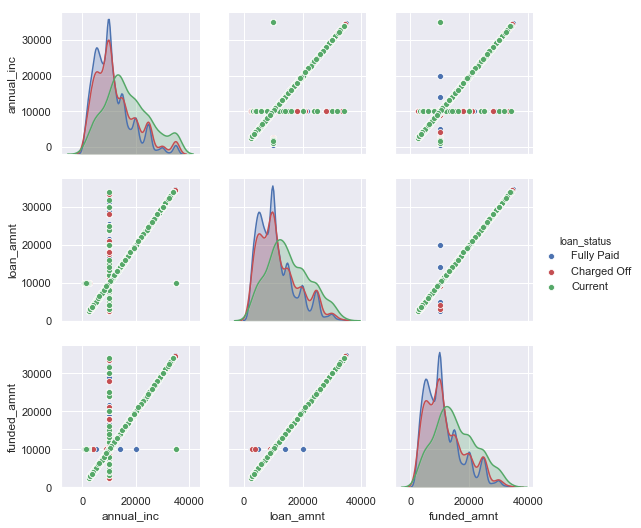

In [42]:
amt = loan[['annual_inc','loan_amnt',
                         'funded_amnt','purpose',"loan_status"]]
amt = amt[(amt['purpose'].notnull()) & (amt['loan_amnt'].notnull())]
sns.pairplot(amt,hue="loan_status",palette=["b","r","g"])
plt.show()

#### Loan with purpose "Small business" have high probability of getting defaulted

7. pivot table for purpose vs bankruptcies with aggregated funciton as "count" for fullyPaid, chargedOff and current

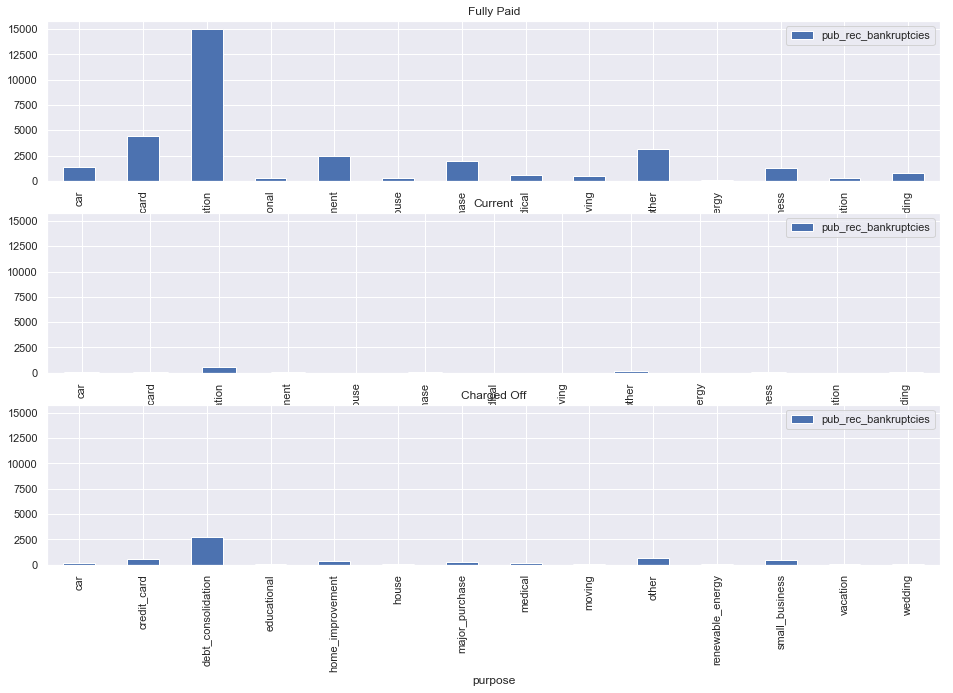

In [43]:
loanPurFully=fullyPaidLoan.pivot_table(index=['purpose'],values='pub_rec_bankruptcies',aggfunc=('count'))
loanPurCurrent=currentLoan.pivot_table(index=['purpose'],values='pub_rec_bankruptcies',aggfunc=('count'))
loanPurDefaulted=defualtedLoan.pivot_table(index=['purpose'],values='pub_rec_bankruptcies',aggfunc=('count'))
f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(16,10))
ax1.title.set_text("Fully Paid")
ax2.title.set_text("Current")
ax3.title.set_text("Charged Off")
loanPurFully.plot.bar(ax=ax1)
loanPurCurrent.plot.bar(ax=ax2)
loanPurDefaulted.plot.bar(ax=ax3)


Inference : bankruptcies are more for purpose deb_consolidation, credit_card, and small bulsinesses in case defaulters

## Summary

### while considering new loan applicent , following variable need to be verified.
1. Address state
    1. states with CA,FL,IL,NJ,NY,PA and TX are defaulted more.
   
2. Purpose
    1. Credit_card, debt_consolidation, small_business and others are defaulted more
    
3. Employment length
    1. employers with > 10 years and > 1 year are defaulted more
   
4. Loan amount
    1. Defaulters take higher range of loan amount
    
5. Interest rate.
     1. Defaulters goes for higher range of interest rate
     
6. Term (tenure)
     1. Defaulters goes for higher tenure(term)